# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [41]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import re
import os
import json
from timeit import default_timer as timer
import datetime as dt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [3]:
import pandas as pd

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Downlaoding url programmatically

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
 #Reading tsv file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

image_prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = '3BUZanCnRT9pJDSe33hjUKuU5'
consumer_secret = 'Xuf3aZXlF0guBNClNBb43p7ZWOnXZ7L2zRWFTjBzzxBKQ4QPEu'
access_token = '83392849-7vl4MOU970IDj4UUKBteOILmvi0xTRgNxppezdqE2'
access_secret = 'Xvk1YnfA8xxExr4ZH3Hr9TfZuzDweQNotkUXUUfEqoiNV'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)



In [ ]:
# Tweet IDs for which to gather additional data via Twitter API
tweet_ids = twitter_archive['tweet_id'].values
len(tweet_ids)


# Query Twitter API for JSON data for each tweet ID in the twitter archive
count = 0
fails_dict = {}
start = timer()



# Save each tweet's returned JSON  a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

In [10]:
# converting json txt file to a list

twitter_archive_list = []

with open('tweet_json.txt') as file:
    for line in file:
        twitter_archive_list.append(json.loads(line))
        



In [5]:
print(twitter_archive_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [14]:
# Creating a Dataframe from twitter_archive_list
archive_json_data = pd.DataFrame(twitter_archive_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [15]:
archive_json_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,6966,33681
1,892177421306343426,5271,29215
2,891815181378084864,3464,21966
3,891689557279858688,7190,36772
4,891327558926688256,7710,35169


In [17]:
# Renaming 'id' to 'tweet_id'
archive_json_data = archive_json_data.rename(columns = {'id':'tweet_id'})
archive_json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6966,33681
1,892177421306343426,5271,29215
2,891815181378084864,3464,21966
3,891689557279858688,7190,36772
4,891327558926688256,7710,35169


In [18]:
# converting the dataframe to a csv
archive_json_data.to_csv('archive_json_data.csv', index=False)
# confirming that dataframe was saved correctly
pd.read_csv('archive_json_data.csv').head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6966,33681
1,892177421306343426,5271,29215
2,891815181378084864,3464,21966
3,891689557279858688,7190,36772
4,891327558926688256,7710,35169


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



- Visual Assessment

In [18]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [57]:
archive_json_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6971,33700
1,892177421306343426,5274,29229
2,891815181378084864,3464,21975
3,891689557279858688,7191,36794
4,891327558926688256,7719,35188
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


- Programmatic Assessment

In [24]:
twitter_archive.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
twitter_archive.sample(20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
140,865006731092295680,NaN,NaN,2017-05-18 00:50:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He really hopes you like his Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865006731...,13,10,Nelly,None,None,None,None
1495,692535307825213440,NaN,NaN,2016-01-28 02:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692535307...,10,10,Amber,None,None,None,None
1832,676191832485810177,NaN,NaN,2015-12-14 00:07:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups just met and have instantly bon...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676191832...,10,10,None,None,None,None,None
632,793962221541933056,NaN,NaN,2016-11-02 23:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. His face is stuck like that. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
2242,667911425562669056,NaN,NaN,2015-11-21 03:44:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Wow. Armored dog here. Ready for battle. Face ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667911425...,5,10,None,None,None,None,None
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you keepin the popcorn bucket in your lap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693622659...,10,10,None,None,None,None,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None


In [29]:
# Summary statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
# Checking for duplicates
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
# Checking for duplicates
twitter_archive['tweet_id'].duplicated().sum()

0

In [32]:
# checking for unique values in each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [80]:
# identifying unusual lower cased names
twitter_archive[twitter_archive['name'].str.islower()==True]['name'].unique()


array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Programmatic Assessment - image_prediction

In [25]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
436,674410619106390016,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False
1439,774639387460112384,https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg,1,Walker_hound,0.627593,True,basenji,0.128705,True,Ibizan_hound,0.126282,True
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False


In [35]:
# Summary statistics
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
# checking for duplicates
image_prediction['tweet_id'].duplicated().sum()

0

### Programmatic Assessment - archive_data

In [48]:
archive_json_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [49]:
# summary statistics
archive_json_data.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2459.190804,7028.188655
std,6.820795e+16,4164.792304,10921.814138
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1144.000000,3039.000000
75%,7.986547e+17,2844.500000,8566.000000
max,8.924206e+17,70351.000000,144286.000000


In [53]:
# checking for duplicates
archive_json_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [58]:
# checking for duplicates
archive_json_data['tweet_id'].duplicated().sum()

0

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Quality issues

1. twitter_archive['name'] has some unusual lower cased names

2. twitter_archive['Timestamp'] data type is listed as an object instead of datetime, split into 2 columns(date, time)

3. Standardize source to show just the specific source without the hyperlink

4. The tweet_id for all 3 tables is listed as a int datatype

5. Analysis requires actual tweets and not retweets. Rows that are retweets will be dropped   

6. retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id are not needed for the analysis and therefore will be dropped.
  
7. in_reply_to_status_id and in_reply_to_user_id are listed as floats

8. p1,p2,p3 columns in image_predictable contains unusual character(_)

9. Inconsistent casing in p1, p2, p3

10. total rating column missing


In [19]:
# Make copies of original pieces of data
twitter_archive_1 = twitter_archive.copy()
image_prediction_1 = image_prediction.copy()
archive_json_data_1 = archive_json_data.copy()

### Issue #1: Name column has some unusual lower cased names

#### Define: 
Replace all unusual lower case names to None

In [21]:
# Identifying unusual names
twitter_archive_1[twitter_archive_1['name'].str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

#### Code

In [22]:
# Replacing unusual with none
unusual = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']

for y in unusual:
    twitter_archive_1.name.replace(y, 'None', inplace=True)
    

#### Test

In [23]:
# Confirming change
twitter_archive_1[twitter_archive_1['name'].str.islower()==True]['name'].unique()

array([], dtype=object)

### Issue #2: 
- twitter_archive['Timestamp'] data type is listed as an object instead of datetime, also 2 variables(date and time) in one column


#### Define : split column into date and time columns, convert datatypes to datetime and Timestamp respectively

#### Code

In [25]:
# Creating new column for date
twitter_archive_1['date'] = twitter_archive_1.timestamp.str.replace(r'[0-9]+:[0-9]+:[0-9]+\s\+[0-9]+', '', regex=True)
twitter_archive_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01


In [26]:
# Removing date from  timestamp column
twitter_archive_1['timestamp'] = twitter_archive_1.timestamp.str.replace(r'\d\d\d\d-\d\d-\d\d', '', regex=True)
twitter_archive_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,NaN,NaN,16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,NaN,NaN,00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01
2,891815181378084864,NaN,NaN,00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31
3,891689557279858688,NaN,NaN,15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30
4,891327558926688256,NaN,NaN,16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29


In [98]:
# Converting date to datetime datatype
pd.to_datetime(twitter_archive_1['date'])

0      2017-08-01
1      2017-08-01
2      2017-07-31
3      2017-07-30
4      2017-07-29
          ...    
2351   2015-11-16
2352   2015-11-16
2353   2015-11-15
2354   2015-11-15
2355   2015-11-15
Name: date, Length: 2356, dtype: datetime64[ns]

#### Test

### Issue #3:  source is a hyperlink


#### Define
Extract specific source from the hyperlink

In [27]:
# identifying the unique sources
twitter_archive_1['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [30]:
# Extracting sources
twitter_archive_1['source_trimmed'] = twitter_archive_1['source'].str.extract('(iphone|Twitter Web Client|Vine|TweetDeck)')
twitter_archive_1['source_trimmed'].value_counts()

    

iphone                2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source_trimmed, dtype: int64

In [185]:
# confirming new column source_trimmed was added
twitter_archive_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,source_trimmed
0,892420643555336193,nan,nan,16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,iphone
1,892177421306343426,nan,nan,00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,iphone


In [187]:
# confirming source distribution corresponds to source_trimmed
twitter_archive_copy['source_trimmed'].value_counts(), twitter_archive_copy['source'].value_counts()

(iphone                2221
 Vine                    91
 Twitter Web Client      33
 TweetDeck               11
 Name: source_trimmed, dtype: int64,
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
 <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
 Name: source, dtype: int64)

### Issue #4:  tweet_id for all 3 tables is listed as a int datatype


#### Define
- Convert tweet_id datatype to object

#### Code
 

In [128]:
# Converting tweet_id to str datatype
twitter_archive_copy.head()
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [130]:
# Converting tweet_id to str datatype
image_prediction_copy.head()
image_prediction_copy['tweet_id'] = image_prediction_copy['tweet_id'].astype(str)

In [132]:
# Converting tweet_id to str datatype
archive_json_data_copy.head()
archive_json_data_copy['tweet_id'] = archive_json_data_copy['tweet_id'].astype(str)

#### Test


In [135]:
# confirming changes
twitter_archive_copy['tweet_id'].dtypes, image_prediction_copy['tweet_id'].dtypes, archive_json_data_copy['tweet_id'].dtypes

(dtype('O'), dtype('O'), dtype('O'))

### Issue #5: Some rows are retweets, analysis requires only tweets
retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id are listed as a float


#### Define
- Drop rows that are retweets
Convert retweet_status_id to object, retweeted_status_timestamp to timestamp and retweetd_status_user_id to object

#### Code

In [147]:
# converting to str
twitter_archive_copy['retweeted_status_id'] = twitter_archive_copy['retweeted_status_id'].astype(str)
twitter_archive_copy['retweeted_status_user_id'] = twitter_archive_copy['retweeted_status_user_id'].astype(str)



In [55]:
# Subsetting for rows that contains only original tweets
twitter_archive_1 = twitter_archive_1[pd.isnull(twitter_archive_1.retweeted_status_id)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [56]:
# Confirming changes
twitter_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Test

### Issue #6: retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id are not needed for the analysis

#### Define
- Drop retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id 

#### Code

In [57]:
#twitter_archive_copy['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_copy['retweeted_status_timestamp'])
twitter_archive_1.drop(columns=['retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'], inplace=True)

#### Test

In [58]:
# Confirming change
twitter_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  date                   2175 non-null   object 
 15  sour

### Issue #7:  in_reply_to_status_id and in_reply_to_user_id are listed as floats


#### Define
convert to strings

#### Code

In [59]:
# Converting to string datatype
twitter_archive_1['in_reply_to_status_id'] = twitter_archive_1['in_reply_to_status_id'].astype(str)
twitter_archive_1['in_reply_to_user_id'] = twitter_archive_1['in_reply_to_user_id'].astype(str)

#### Test


In [60]:
# Confirming changes
twitter_archive_1['in_reply_to_status_id'].dtypes, twitter_archive_1['in_reply_to_user_id'].dtypes

(dtype('O'), dtype('O'))

### Issue #8: p1, p2, p3 coulmns in image_prediction contains unusual character

#### Define
- Slice off the "_" in the columns listed above

In [205]:
# Inspecting the dataframe
image_prediction_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [61]:
# Replacing "_" 
image_prediction_1['p1'] = image_prediction_1['p1'].str.replace("_", " ")
image_prediction_1['p2'] = image_prediction_1['p2'].str.replace("_", " ")
image_prediction_1['p3'] = image_prediction_1['p3'].str.replace("_", " ")


#### Test

In [62]:
# Confirming result
image_prediction_1['p1'].sample(20)

1013        golden retriever
502         golden retriever
1382                Pembroke
64           giant schnauzer
244                  axolotl
1666            Irish setter
877                    boxer
826       Labrador retriever
1225    Old English sheepdog
1771                  collie
1128           Border collie
1272                  muzzle
1475                     pug
1694              Pomeranian
1732         German shepherd
910           Great Pyrenees
1815               Chihuahua
741                 Shih-Tzu
1841                    chow
2000    Bernese mountain dog
Name: p1, dtype: object

In [209]:
# Inspecting whole dataframe
image_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9: Inconsistent casing in p1, p2, p3

#### Define 
- Capitalize first alphabet in all 3 columns

#### Code

In [64]:
# Capitalizing all first alphabets in all 3 columns
image_prediction_1['p1'] = image_prediction_1['p1'].str.capitalize()
image_prediction_1['p2'] = image_prediction_1['p2'].str.capitalize()
image_prediction_1['p3'] = image_prediction_1['p3'].str.capitalize()


#### Test

In [65]:
# Confirming results
image_prediction_1.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,1,Staffordshire bullterrier,0.587764,True,American staffordshire terrier,0.281429,True,Bull mastiff,0.094798,True
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian greyhound,0.618316,True,Weimaraner,0.151363,True,Vizsla,0.085989,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,Chow,0.168909,True,Norfolk terrier,0.129114,True,Pomeranian,0.120822,True
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,Giant panda,0.451149,False,Fur coat,0.148001,False,Pug,0.109570,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,Guinea pig,0.996496,False,Skunk,0.002402,False,Hamster,0.000461,False
1655,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,Malamute,0.620768,True,Eskimo dog,0.158395,True,Tibetan mastiff,0.028962,True
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian greyhound,0.173114,True,Muzzle,0.071485,False
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,Web site,0.919649,False,Menu,0.026306,False,Crossword puzzle,0.003482,False
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian camel,0.999614,False,Bison,0.000228,False,Llama,0.000067,False


### Issue #10: total rating column missing

#### Define
Compute rating_numerator / rating_denominator

#### Code

In [67]:
# Calculating actual rating 
twitter_archive_1['total_rating'] = twitter_archive_1['rating_numerator'] / twitter_archive_1['rating_denominator']

#### Test

In [69]:
# Confirming new column
twitter_archive_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,source_trimmed,total_rating
0,892420643555336193,nan,nan,16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,iphone,1.3
1,892177421306343426,nan,nan,00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,iphone,1.3
2,891815181378084864,nan,nan,00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,iphone,1.2
3,891689557279858688,nan,nan,15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,iphone,1.3
4,891327558926688256,nan,nan,16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,iphone,1.2


### Tidiness issues
1. Dog stage columns will need to be merged into one column

2. The twitter_archive_1 table contains columns that are not needed for analysis

### Issue #1: doggo, floofer, pupper, puppo need not be in seperate columns


#### Define
- Merge dog stage(doggo, floofer, pupper, puppo) columns into new column(dog_stage)

#### Code

In [ ]:
# Confirming value_counts for each dog stage

In [77]:
twitter_archive_1['doggo'].value_counts(), twitter_archive_1['floofer'].value_counts(), twitter_archive_1['pupper'].value_counts(), twitter_archive_1['puppo'].value_counts() 

(None     2088
 doggo      87
 Name: doggo, dtype: int64,
 None       2165
 floofer      10
 Name: floofer, dtype: int64,
 None      1941
 pupper     234
 Name: pupper, dtype: int64,
 None     2150
 puppo      25
 Name: puppo, dtype: int64)

- The text column contains info on the dog stage. In the next cell, I will attempt to extract the dog stage info and store in a new column dog_stage

In [74]:
# extracting dog stage info from the text column and storing in dog_stage column
twitter_archive_1['dog_stage'] = twitter_archive_1['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [75]:
# confirming new dog_stage column
twitter_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  2175 non-null   object 
 2   in_reply_to_user_id    2175 non-null   object 
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  date                   2175 non-null   object 
 15  sour

In [76]:
# confirming the value-counts for each dog stage
twitter_archive_1['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

- 5 new dog_stage info were extracted from the text column in addition to the info already contained in (doggo, floofer, pupper, puppo) columns.

In [204]:
# Sampling dog_stage column
twitter_archive_copy['dog_stage'].sample(20)

833        NaN
1459       NaN
786        NaN
477      doggo
1904       NaN
26         NaN
1039     doggo
343        NaN
1466       NaN
1033       NaN
411        NaN
1692       NaN
261        NaN
1604       NaN
1364       NaN
1340    pupper
1068       NaN
848        NaN
203        NaN
867        NaN
Name: dog_stage, dtype: object

### Issue #2: twitter_archive_1 table contains columns that are not needed for analysis

#### Define
- Drop the following columns( source, doggo, floofer, pupper, puppo, source, in_reply_to_status_id, in_reply_to_user_id )

In [78]:
twitter_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  2175 non-null   object 
 2   in_reply_to_user_id    2175 non-null   object 
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  date                   2175 non-null   object 
 15  sour

#### Code

In [84]:
# dropping columns not needed for analysis
twitter_archive_1.drop(columns=['source', 'doggo', 'floofer', 'pupper', 'puppo', 'source'], inplace=True)

#### Test

In [85]:
# confirming results
twitter_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  2175 non-null   object 
 2   in_reply_to_user_id    2175 non-null   object 
 3   timestamp              2175 non-null   object 
 4   text                   2175 non-null   object 
 5   expanded_urls          2117 non-null   object 
 6   rating_numerator       2175 non-null   int64  
 7   rating_denominator     2175 non-null   int64  
 8   name                   2175 non-null   object 
 9   date                   2175 non-null   object 
 10  source_trimmed         2175 non-null   object 
 11  total_rating           2175 non-null   float64
 12  dog_stage              364 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 237.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
# Merging all datasets
df_clean_merge = pd.merge(twitter_archive_1, image_prediction_1, on='tweet_id', how='inner')
df_clean_merge = pd.merge(df_clean_merge, archive_json_data_1, on='tweet_id', how='inner')


In [87]:
# confirming merge
df_clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  1986 non-null   object 
 2   in_reply_to_user_id    1986 non-null   object 
 3   timestamp              1986 non-null   object 
 4   text                   1986 non-null   object 
 5   expanded_urls          1986 non-null   object 
 6   rating_numerator       1986 non-null   int64  
 7   rating_denominator     1986 non-null   int64  
 8   name                   1986 non-null   object 
 9   date                   1986 non-null   object 
 10  source_trimmed         1986 non-null   object 
 11  total_rating           1986 non-null   float64
 12  dog_stage              324 non-null    object 
 13  jpg_url                1986 non-null   object 
 14  img_num                1986 non-null   int64  
 15  p1  

In [88]:
df_clean_merge

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,date,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6966,33681
1,892177421306343426,nan,nan,00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5271,29215
2,891815181378084864,nan,nan,00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3464,21966
3,891689557279858688,nan,nan,15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,7190,36772
4,891327558926688256,nan,nan,16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7710,35169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,nan,nan,00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,2015-11-16,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,36,88
1982,666044226329800704,nan,nan,00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,2015-11-16,...,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,114,246
1983,666033412701032449,nan,nan,23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,2015-11-15,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,36,100
1984,666029285002620928,nan,nan,23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,2015-11-15,...,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,39,112


In [89]:
# Saving to twitter_archive_master.csv
df_clean_merge.to_csv("twitter_archive_master.csv", encoding='utf-8', index=False)

In [7]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,date,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6966,33681
1,892177421306343426,NaN,NaN,00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5271,29215
2,891815181378084864,NaN,NaN,00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3464,21966
3,891689557279858688,NaN,NaN,15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,7190,36772
4,891327558926688256,NaN,NaN,16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7710,35169


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.The most popular dog names are Cooper, Charlie and Oliver

2.Tweet count peaked between November and December of 2015 and then a sharp drop afterwards

3.11-28, 11-29 and 11-16 of 2015 have the 3 highest daily tweet count

4.There is a positive relationship between retweet_count and favorite_count

5. 98% of the tweets origianted from an iphone

6. Top total ratings for dogs are 12, 10,11, 13

7. Sentiment analysis showed mostly positive disposition on the text column.

### Visualization

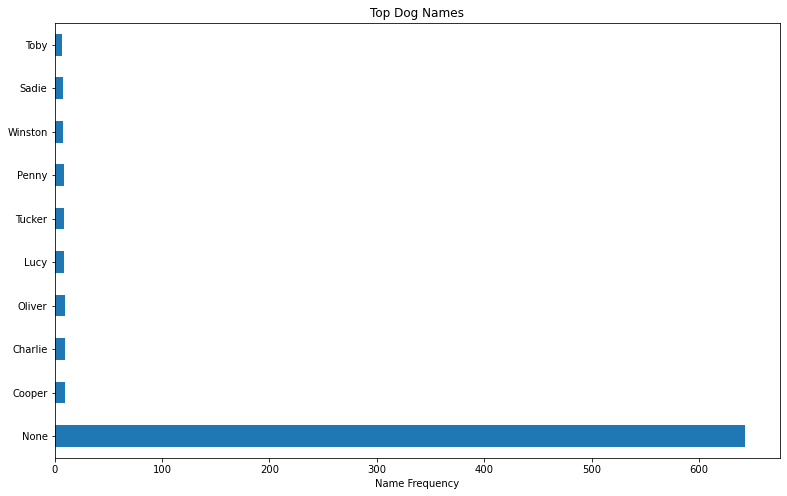

In [96]:
#Visualizing the most popular dog names
df['name'].value_counts()[0:10].plot(kind = 'barh', figsize=(13,8), title = 'Top Dog Names').set_xlabel('Name Frequency');

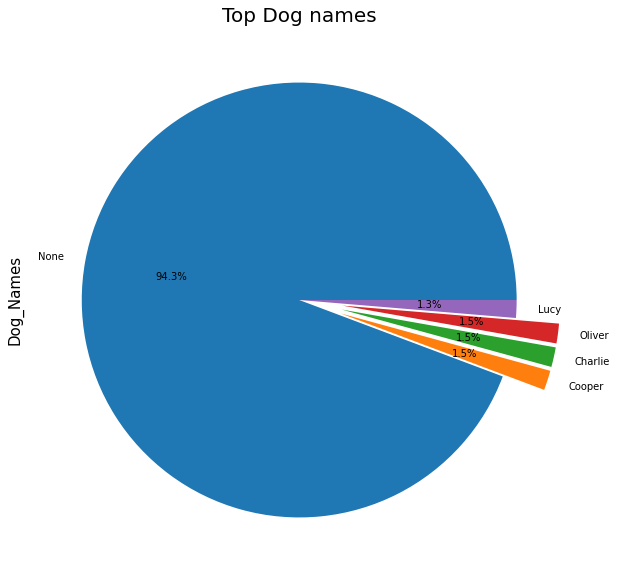

In [170]:
# Pie chart of 5 Top dog names
Dog_Names = df.name.value_counts()[0:5].plot(kind='pie', figsize=(15,10), autopct = '%.1f%%', explode=(0,0.2, 0.2, 0.2 ,0))
plt.ylabel('Dog_Names', fontsize=15)
plt.title('Top Dog names', fontsize=20);


In [129]:
# Calculating date range 
df['date'].max(), df['date'].min()

('2017-08-01 ', '2015-11-15 ')

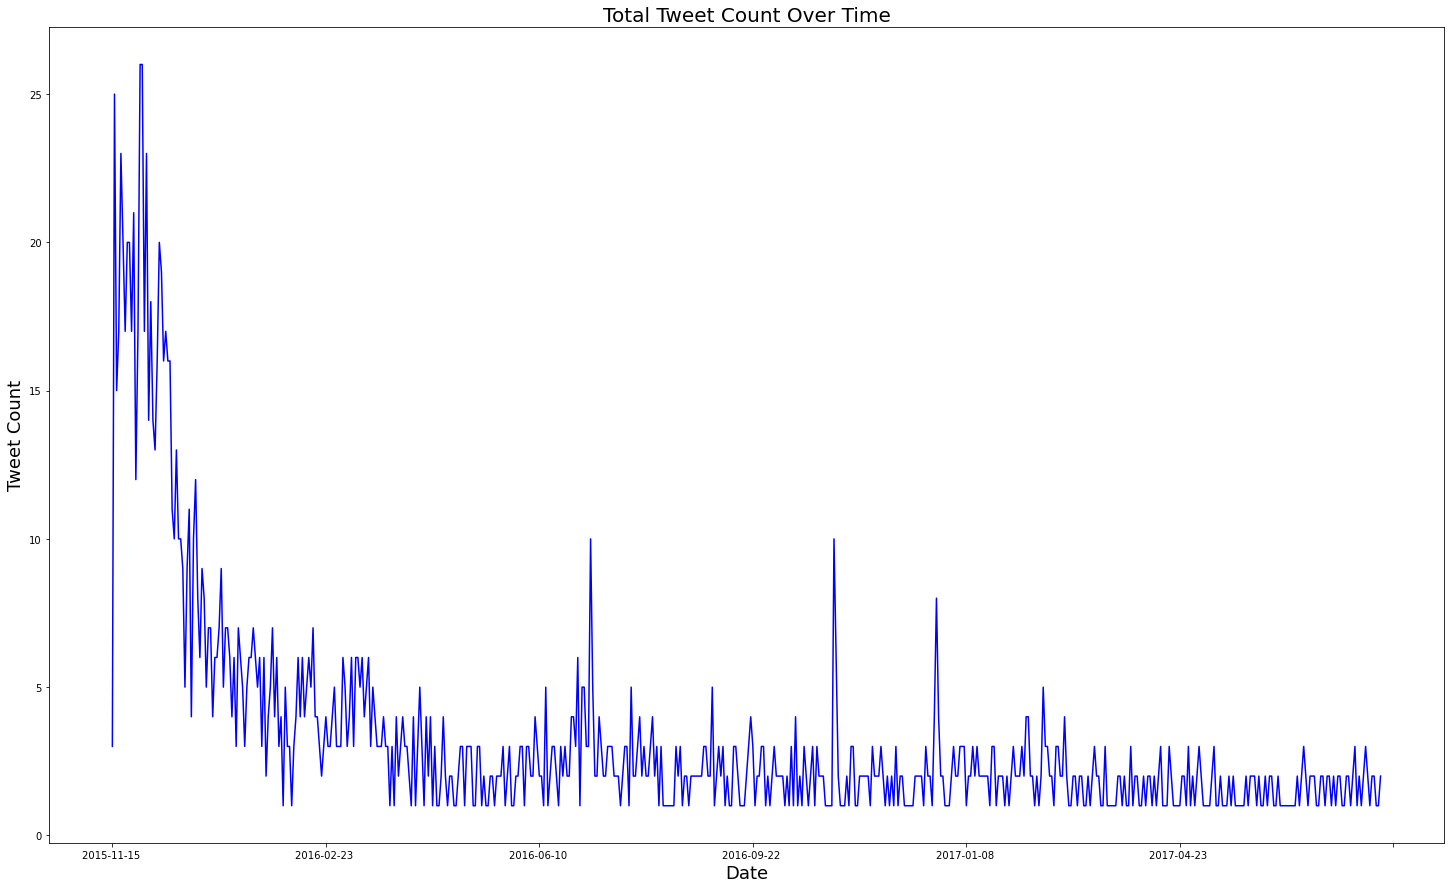

In [46]:
# Line plot of tweet count over time
df.groupby('date')['tweet_id'].count().plot(kind='line', figsize=(25,15), color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18 )
plt.title('Total Tweet Count Over Time', fontsize=20);



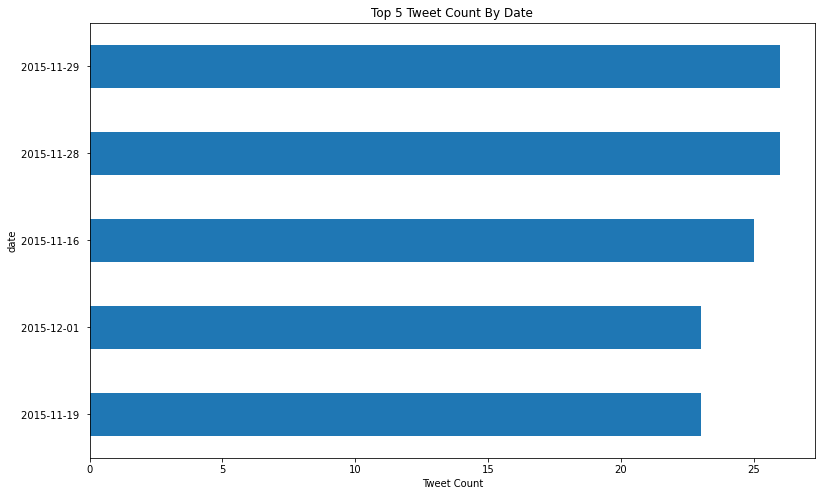

In [132]:
# Bar plot of the tweet counts by date sorted in ascending order by count.
df.groupby('date')['tweet_id'].count().sort_values().tail().plot(kind = 'barh', figsize=(13,8), title = 'Top 5 Tweet Count By Date').set_xlabel('Tweet Count');

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   text                   1986 non-null   object 
 5   expanded_urls          1986 non-null   object 
 6   rating_numerator       1986 non-null   int64  
 7   rating_denominator     1986 non-null   int64  
 8   name                   1986 non-null   object 
 9   date                   1986 non-null   object 
 10  source_trimmed         1986 non-null   object 
 11  total_rating           1986 non-null   float64
 12  dog_stage              324 non-null    object 
 13  jpg_url                1986 non-null   object 
 14  img_num                1986 non-null   int64  
 15  p1  

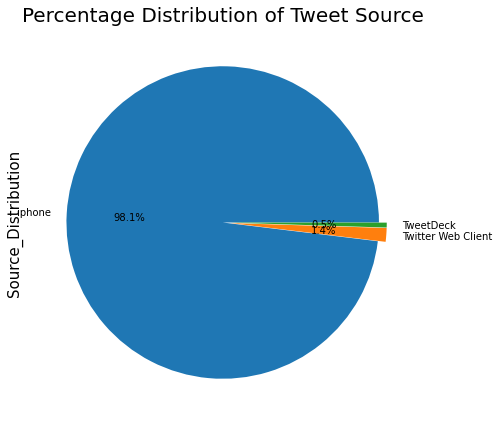

In [142]:
Source_Distribution = df.source_trimmed.value_counts().plot(kind='pie', figsize=(7,10), autopct = '%.1f%%', explode=(0,0.05, 0.05))
plt.ylabel('Source_Distribution', fontsize=15)
plt.title('Percentage Distribution of Tweet Source', fontsize=20);


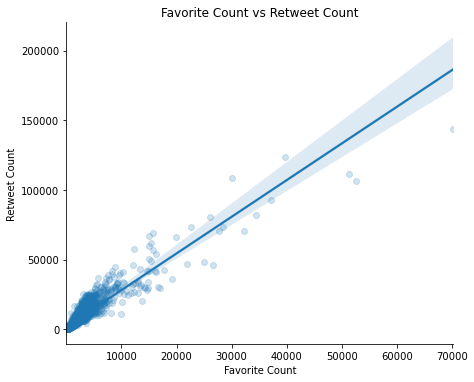

In [149]:
# line plot of favorite count and retweet count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs Retweet Count');
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   text                   1986 non-null   object 
 5   expanded_urls          1986 non-null   object 
 6   rating_numerator       1986 non-null   int64  
 7   rating_denominator     1986 non-null   int64  
 8   name                   1986 non-null   object 
 9   date                   1986 non-null   object 
 10  source_trimmed         1986 non-null   object 
 11  total_rating           1986 non-null   float64
 12  dog_stage              324 non-null    object 
 13  jpg_url                1986 non-null   object 
 14  img_num                1986 non-null   int64  
 15  p1  

In [11]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,date,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6966,33681
1,892177421306343426,NaN,NaN,00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5271,29215
2,891815181378084864,NaN,NaN,00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3464,21966
3,891689557279858688,NaN,NaN,15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,7190,36772
4,891327558926688256,NaN,NaN,16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7710,35169


In [15]:
# Calculating mean of rating_numerator and rating_denominator
df.rating_numerator.mean(), df.rating_denominator.mean()

(12.281973816717018, 10.534239677744209)

In [17]:
# Calculating median of rating_numerator and rating_denominator
df.rating_numerator.median(), df.rating_numerator.median()

(11.0, 11.0)

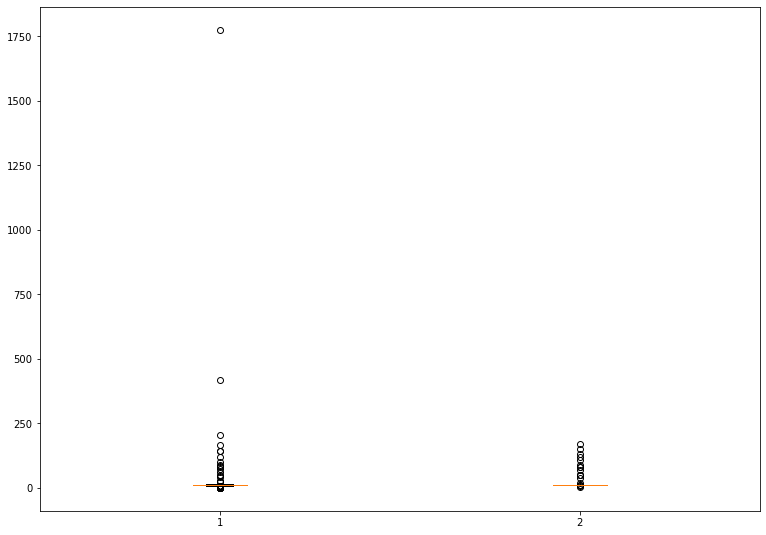

In [27]:
# Boxplot of rating_numerator and rating_denominator
numerator = df.rating_numerator
denominator = df.rating_denominator
rating = [numerator, denominator]

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
ax.boxplot(rating)
plt.title("Boxplot of Rating Numerator")

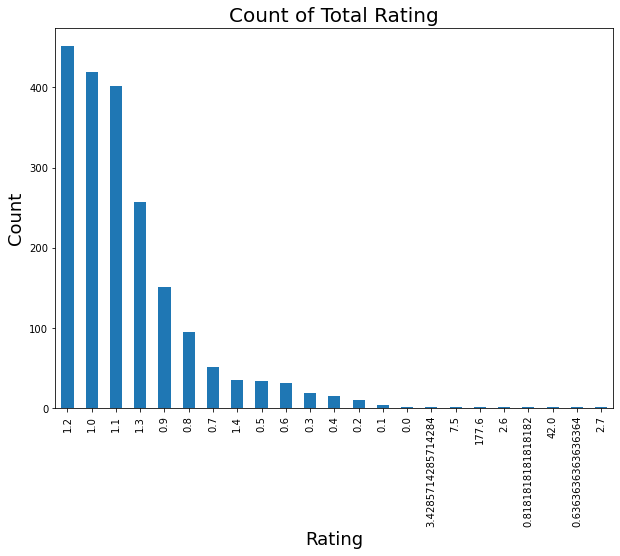

In [32]:
# Histogram distribution of total rating 
df['total_rating'].value_counts().plot(kind='bar', figsize=(10,7))
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Count of Total Rating', fontsize=20);


In [33]:
# Sentiment Analysis
df['text'].apply(lambda x: TextBlob(x).sentiment)

0                                      (0.0, 1.0)
1       (0.3666666666666667, 0.43333333333333335)
2                                    (0.15, 0.45)
3                                     (0.5, 0.15)
4                       (0.2333333333333333, 0.6)
                          ...                    
1981                                   (0.0, 0.0)
1982                                   (0.0, 0.0)
1983                                  (0.5, 0.55)
1984                  (-0.06666666666666667, 0.3)
1985                   (0.0, 0.03333333333333333)
Name: text, Length: 1986, dtype: object

In [34]:
#Creating new columns for Polarity and Subjectivity
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment[1])

In [35]:
# Confirming new columns
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,date,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,polarity,subjectivity
0,892420643555336193,NaN,NaN,16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,...,Bagel,0.085851,False,Banana,0.076110,False,6966,33681,0.000000,1.000000
1,892177421306343426,NaN,NaN,00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,...,Pekinese,0.090647,True,Papillon,0.068957,True,5271,29215,0.366667,0.433333
2,891815181378084864,NaN,NaN,00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,...,Malamute,0.078253,True,Kelpie,0.031379,True,3464,21966,0.150000,0.450000
3,891689557279858688,NaN,NaN,15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,...,Labrador retriever,0.168086,True,Spatula,0.040836,False,7190,36772,0.500000,0.150000
4,891327558926688256,NaN,NaN,16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,...,English springer,0.225770,True,German short-haired pointer,0.175219,True,7710,35169,0.233333,0.600000


In [36]:
# Calculating polarity mean and median
df['polarity'].mean(), df['polarity'].median()

(0.13905348915192822, 0.05)

In [37]:
# Calculating subjectivity mean and median
df['subjectivity'].mean(), df['subjectivity'].median()

(0.4887551301035694, 0.5125)